*EX01. Descarrega el dataset adjunt preu lloguer per trimestre i barri.csv extret de la web OpenDataBCN i resumeix-lo estadísticament i gràficament.*



In [197]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from tabulate import tabulate

df = pd.read_csv('preu lloguer per trimestre i barri.csv')
print(tabulate(df.info()))
print(str(df.isnull().any().any())+'\n')
print(tabulate(df.head(5), headers = 'keys', stralign="center", numalign="right", showindex=False))
print(tabulate(df.tail(5), headers = 'keys', stralign="center", numalign="right", showindex=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Any             584 non-null    int64 
 1   Trimestre       584 non-null    int64 
 2   Codi_Districte  584 non-null    int64 
 3   Nom_Districte   584 non-null    object
 4   Codi_Barri      584 non-null    int64 
 5   Nom_Barri       584 non-null    object
 6   Lloguer_mitja   584 non-null    object
 7   Preu            584 non-null    object
dtypes: int64(4), object(4)
memory usage: 36.6+ KB

False

  Any    Trimestre    Codi_Districte   Nom_Districte     Codi_Barri                Nom_Barri                          Lloguer_mitja              Preu
-----  -----------  ----------------  ---------------  ------------  -------------------------------------  ---------------------------------  ------
 2021            1                 1   Ciutat Vella               1                el Raval      

Exploración inicial

Antes de empezar, además de importar todas las librerías y módulos que podemos necesitar, exploramos el dataset, para ver los campos y si existen valores nulos que limpiar. En este caso no los hay (False). Finalmente imprimimos una muestra de los 5 primeros y últimos registros para tener una idea más concreta. En este caso nos llaman la atención las columnas Lloguer_mitja y Preu, en tanto parecen diferenciar dos categorías: precio por metro cuadrado y mes o precio por vivienda y mes.

In [198]:
pd.set_option('display.max_rows', 8)
print(df[['Nom_Barri', 'Trimestre', 'Lloguer_mitja']].groupby(['Nom_Barri', 'Trimestre', 'Lloguer_mitja']).size())

Nom_Barri        Trimestre  Lloguer_mitja                              
Baró de Viver    1          Lloguer mitjà mensual (Euros/mes)              1
                            Lloguer mitjà per superfície (Euros/m2 mes)    1
                 2          Lloguer mitjà mensual (Euros/mes)              1
                            Lloguer mitjà per superfície (Euros/m2 mes)    1
                                                                          ..
les Tres Torres  3          Lloguer mitjà mensual (Euros/mes)              1
                            Lloguer mitjà per superfície (Euros/m2 mes)    1
                 4          Lloguer mitjà mensual (Euros/mes)              1
                            Lloguer mitjà per superfície (Euros/m2 mes)    1
Length: 584, dtype: int64


Visualizamos la distribución temporal y geográfica de los datos, que están distribuidos con dos registros para cada trimestre para cada barrio. Uno mide el precio medio del alquiler de la vivienda, y el otro el precio medio del metro cuadrado.

Cada barrio cuenta entonces con 8 registros, dos por trimestre.

In [199]:
df['Preu'] = pd.to_numeric(df['Preu'], errors='coerce')
print(str(df[df['Lloguer_mitja'] == 'Lloguer mitjà mensual (Euros/mes)'][['Nom_Barri','Preu']]
          .groupby('Nom_Barri').mean().sort_values(by='Preu'))+'\n')
print(df[df['Lloguer_mitja'] == 'Lloguer mitjà per superfície (Euros/m2 mes)'][['Nom_Barri','Preu']]
      .groupby('Nom_Barri').mean().sort_values(by='Preu'))

                               Preu
Nom_Barri                          
Ciutat Meridiana            525.700
Baró de Viver               532.100
la Trinitat Nova            592.750
la Trinitat Vella           607.275
...                             ...
Torre Baró                      NaN
Vallbona                        NaN
la Clota                        NaN
la Marina del Prat Vermell      NaN

[73 rows x 1 columns]

                             Preu
Nom_Barri                        
Baró de Viver               7.950
Ciutat Meridiana            8.900
Canyelles                   9.325
la Guineueta                9.700
...                           ...
Torre Baró                    NaN
Vallbona                      NaN
la Clota                      NaN
la Marina del Prat Vermell    NaN

[73 rows x 1 columns]


Ordenamos los barrios según el precio medio del alquiler, por vivienda y por metro cuadrado, de menor a mayor.
Vemos que existen una serie de barrios para los que no obtenemos valores.

In [200]:
barrios_sin_datos = df[df['Preu'].isnull()]

print(barrios_sin_datos[['Nom_Barri', 'Preu']].groupby('Nom_Barri').size())

Nom_Barri
Baró de Viver                 4
Can Peguera                   8
Torre Baró                    8
Vallbona                      8
la Clota                      8
la Marina del Prat Vermell    8
dtype: int64


Contamos el número de filas / registros, para las que no tenemos precio. Son 5 Barrios sin precio y uno con precio sólo para la mitad de registros.

In [201]:
print(tabulate(df[df['Nom_Barri'] == 'Baró de Viver'][['Nom_Barri', 'Trimestre', 'Lloguer_mitja', 'Preu']],
               headers = 'keys', stralign="left", numalign="right", showindex=False))
print('\n'+str(tabulate(df[df['Nom_Barri'] == 'Torre Baró'][['Nom_Barri', 'Trimestre', 'Lloguer_mitja', 'Preu']],
                   headers = 'keys', stralign="left", numalign="right", showindex=False)))

Nom_Barri        Trimestre  Lloguer_mitja                                  Preu
-------------  -----------  -------------------------------------------  ------
Baró de Viver            1  Lloguer mitjà mensual (Euros/mes)               nan
Baró de Viver            1  Lloguer mitjà per superfície (Euros/m2 mes)     nan
Baró de Viver            2  Lloguer mitjà mensual (Euros/mes)             447.5
Baró de Viver            2  Lloguer mitjà per superfície (Euros/m2 mes)     6.7
Baró de Viver            3  Lloguer mitjà mensual (Euros/mes)               nan
Baró de Viver            3  Lloguer mitjà per superfície (Euros/m2 mes)     nan
Baró de Viver            4  Lloguer mitjà mensual (Euros/mes)             616.7
Baró de Viver            4  Lloguer mitjà per superfície (Euros/m2 mes)     9.2

Nom_Barri      Trimestre  Lloguer_mitja                                  Preu
-----------  -----------  -------------------------------------------  ------
Torre Baró             1  Lloguer mitjà men

Vemos los registros para `Baró de Viver` y `Torre Baró`, representativos de todos los barrios para los que no tenemos registros.

En el primer caso lo que sucede es que no hay registros para el primer y tercer trimestre, ni para el precio medio del alquiler por vivienda, ni para el precio medio por metro cuadrado. En el segundo caso, como para los otros 4 barrios que estudiamos, no los hay, en cualquiera de los dos casos, para ningún trimestre.

In [202]:
nombres_barrios_sin_datos = barrios_sin_datos['Nom_Barri'].unique()
df = df[~df['Nom_Barri'].isin(nombres_barrios_sin_datos)]
df = df[~((df['Nom_Barri'] == 'Baró de Viver') & (df['Trimestre'].isin([1, 3])))]

Eliminamos todos los barrios para los que no tenemos datos.

In [203]:
por_vivienda = df[df['Lloguer_mitja'] == 'Lloguer mitjà mensual (Euros/mes)']
por_metro = df[df['Lloguer_mitja'] == 'Lloguer mitjà per superfície (Euros/m2 mes)']
print('Precio de alquiler en Barcelona en 2021, por vivienda:\n')
print(str(por_vivienda['Preu'].describe().round(1))+'\n')
print('Precio de alquiler en Barcelona en 2021, por metro:\n')
print(por_metro['Preu'].describe().round(1))

Precio de alquiler en Barcelona en 2021, por vivienda:

count     268.0
mean      874.1
std       219.9
min       488.1
25%       745.1
50%       817.3
75%       938.0
max      1816.5
Name: Preu, dtype: float64

Precio de alquiler en Barcelona en 2021, por metro:

count    268.0
mean      12.8
std        1.7
min        8.1
25%       11.7
50%       12.8
75%       13.6
max       18.0
Name: Preu, dtype: float64


Hacemos una descripción de los datos diferenciando el precio por vivienda del precio por metro cuadrado, tratando a todos los barrios en conjunto. La media de todos los barrios está en 874 y 12.8 respectivamente. La mediana es 817.3 y 12.8 respectivamente. La desviación típica 220 y 1.7. El barrio con un precio medio más alto de alquiler para todo el año por trimestre lo tiene en 1816€ y por metro cuadrado en 18€/m2, el mínimo está en 488.1€ y 8.1€/m2.

In [204]:
# Índice del precio de la vivienda según el barrio

precio_medio_metro = por_metro['Preu'].mean()
precio_medio_vivienda = por_vivienda['Preu'].mean()

x = 1
y = 1

while(x < 74):
  indice_metro = round((df[(df['Codi_Barri'] == x) & (df['Lloguer_mitja'] == 'Lloguer mitjà per superfície (Euros/m2 mes)')]['Preu'].mean())/precio_medio_metro, 2)
  df.loc[(df['Codi_Barri'] == x) & (df['Lloguer_mitja'] == 'Lloguer mitjà per superfície (Euros/m2 mes)'), 'Index_Barri'] = indice_metro
  x += 1

while(y < 74):
  indice_vivienda = round((df[(df['Codi_Barri'] == y) & (df['Lloguer_mitja'] == 'Lloguer mitjà mensual (Euros/mes)')]['Preu'].mean())/precio_medio_vivienda, 2)
  df.loc[(df['Codi_Barri'] == y) & (df['Lloguer_mitja'] == 'Lloguer mitjà mensual (Euros/mes)'), 'Index_Barri'] = indice_vivienda
  y += 1
columnas_indice = df[['Nom_Barri', 'Index_Barri']].drop_duplicates(subset=['Nom_Barri']).sort_values(by='Index_Barri')
columnas_indice = columnas_indice.reset_index(drop=True)
print(tabulate(columnas_indice, headers = 'keys', stralign="left", numalign="right", showindex=False))

Nom_Barri                                       Index_Barri
--------------------------------------------  -------------
Ciutat Meridiana                                        0.6
la Trinitat Nova                                       0.68
la Trinitat Vella                                      0.69
les Roquetes                                           0.71
Verdun                                                 0.74
el Carmel                                              0.77
la Prosperitat                                         0.77
la Guineueta                                           0.77
el Bon Pastor                                          0.78
el Turó de la Peira                                    0.78
el Besòs i el Maresme                                  0.81
Sant Genís dels Agudells                               0.81
la Teixonera                                           0.82
Porta                                                  0.82
la Verneda i la Pau                     

Creamos una columna nueva `Index_Barri` que mide la relación del precio de la vivienda entre ese barrio y el conjunto de todos los barrios. Los valores por debajo de 1 indican que el precio está por debajo de la media.

Crea almenys una visualització per:

A. Una variable categòrica (Districte o Barri)

In [205]:
!pip install squarify

In [206]:
df = pd.read_csv('preu lloguer per trimestre i barri.csv')

Volvemos a cargar el dataset inicial para representar correctamente en el siguiente gráfico el tamaño de cada distrito. Anteriormente lo habíamos filtrado eliminando los barrios, trimestres en el caso de 'Baró de Viver', para los que no teníamos registro de precio, con el fin de hacer el análisis estadístico, en el cual varían ligeramente algunos cálculos entre incluirlos y no incluirlos.

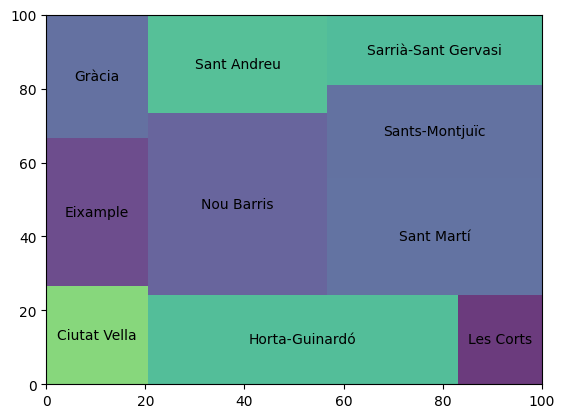

In [207]:
import squarify

y = df.groupby('Nom_Districte').size()
squarify.plot(sizes=y, label=y.index, alpha=.8)
plt.savefig('area_districtes')
plt.show()

Aquí podemos ver el tamaño relativo aproximado de los distritos.

B. Una variable numèrica (Preu)

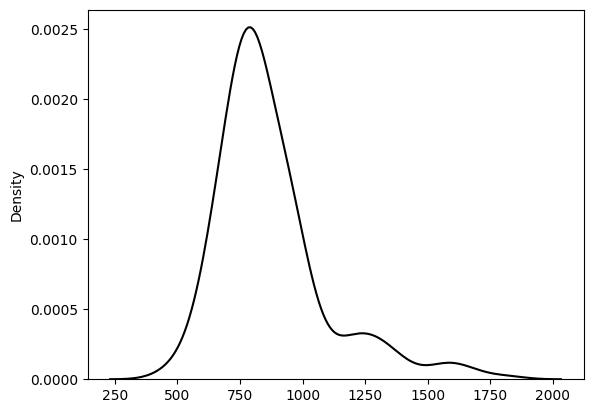

In [208]:
preus = df[df['Lloguer_mitja'] == 'Lloguer mitjà mensual (Euros/mes)']['Preu']
df['Preu'] = pd.to_numeric(df['Preu'], errors='coerce')

sns.kdeplot(preus_num.values, color = 'black')
plt.savefig('distribucion_precios_vivienda')

Representamos la variable precios mensuales por vivienda normalizada, lo que nos permite tener una idea bastante aproximada de la ditribución de precios de alquiler por vivienda en Barcelona en 2021.

C. Una variable numèrica i una categòrica (Districte i Preu)

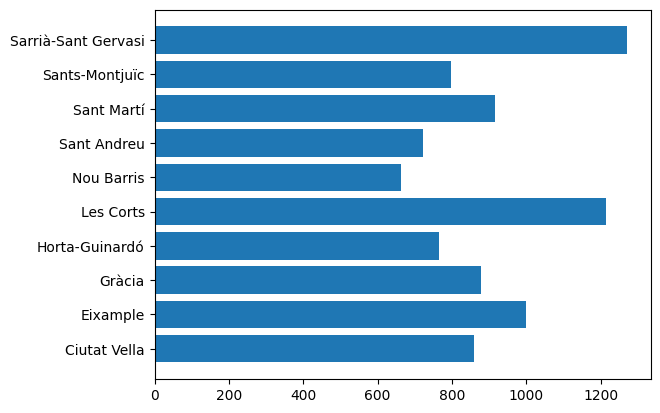

In [209]:
preus = df[df['Lloguer_mitja'] == 'Lloguer mitjà mensual (Euros/mes)'].groupby('Nom_Districte')['Preu'].mean()

x = preus.index
y = preus.values

plt.barh(x,y)
plt.savefig('preu_vivenda_districte')
plt.show()

Representamos los precios medios de alquiler por vivienda por distrito, para todo el año.

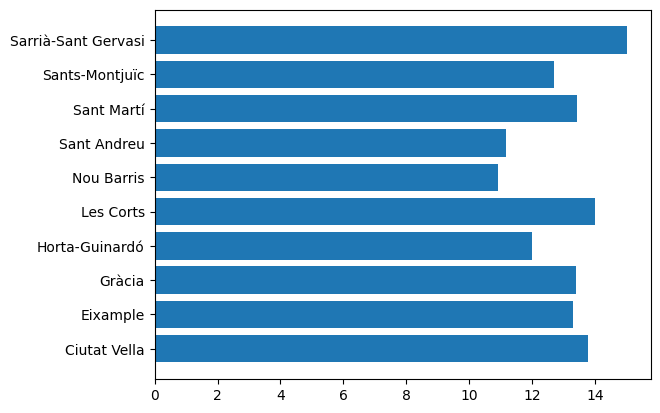

In [210]:
preus = df[df['Lloguer_mitja'] == 'Lloguer mitjà per superfície (Euros/m2 mes)'].groupby('Nom_Districte')['Preu'].mean()

x = preus.index
y = preus.values

plt.barh(x,y)
plt.savefig('preu_metre_districte')
plt.show()

Y los precios medios de alquiler por metro cuadrado por distrito.

D. Dues variables numèriques (Any o Trimestre i Preu)

<Axes: >

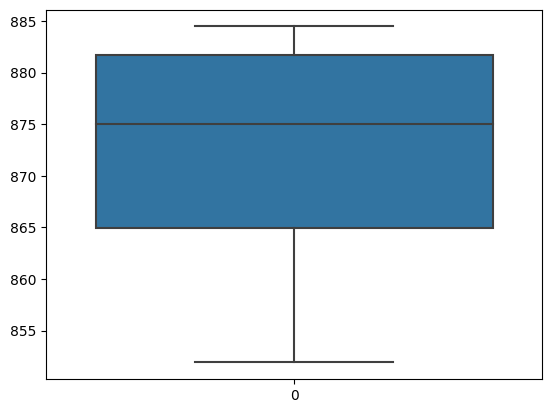

In [211]:
preus_trimestre = df[df['Lloguer_mitja'] == 'Lloguer mitjà mensual (Euros/mes)'].groupby('Trimestre')['Preu'].mean()

plt.savefig('preu_trimestre')
sns.boxplot(preus_trimestre.values)

En este caso vemos la distribución de precios medios de la vivienda por trimestre para 2021 en Barcelona agrupados por trimestres, mostrándose los valores mínimo, máximo y los cuartiles 1, 2 (mediana) y 3.

E. Tres variables (Barri o Districte, Trimestre i Preu)

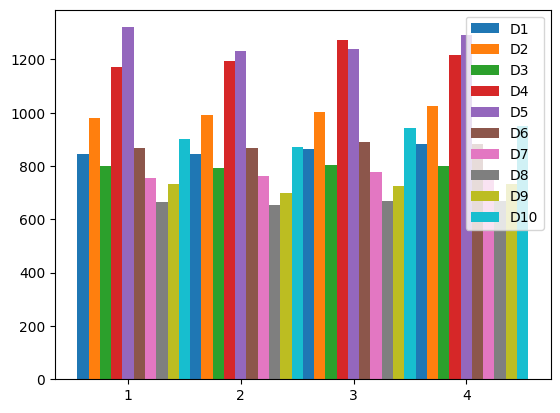

In [212]:
d = {}
bar = {}
bars = []
districtes = []

for i in range(1, 11):
  d[str(i)] = df[(df['Codi_Districte'] == i) & (df['Lloguer_mitja'] ==
                                 'Lloguer mitjà mensual (Euros/mes)')].groupby(['Trimestre'])['Preu'].mean().round(1).values

for n in range(1, 11):
  bar[str(n)] = plt.bar(np.arange(1, 5) + 0.1*(0+n), d[str(n)], 0.1)
  bars.append(bar[str(n)])
  districtes.append('D'+str(n))

plt.xticks(np.arange(1, 5) + 0.5, ['1', '2', '3', '4'])
plt.legend(bars, districtes)
plt.savefig('preu_trimestre_districte')
plt.show()

Representamos en el eje horizontal los 4 trimestres, para los 10 distritos, cada uno con una barra, cuyo código de distrito se muestra en la leyenda, mientras en el eje vertical mostramos el precio medio por vivienda.

EX02. Exporta els gràfics com imatges o com HTML.

Hecho en cada uno de los gráficos.

EX03. Proposa alguna visualització que creguis que pot resultar interessant.


In [214]:
# Índice del precio de la vivienda según el barrio

precio_medio_metro = por_metro['Preu'].mean()
precio_medio_vivienda = por_vivienda['Preu'].mean()

x = 1
y = 1

while(x < 74):
  indice_metro = round((df[(df['Codi_Barri'] == x) & (df['Lloguer_mitja'] == 'Lloguer mitjà per superfície (Euros/m2 mes)')]['Preu'].mean())/precio_medio_metro, 2)
  df.loc[(df['Codi_Barri'] == x) & (df['Lloguer_mitja'] == 'Lloguer mitjà per superfície (Euros/m2 mes)'), 'Index_Barri'] = indice_metro
  x += 1

while(y < 74):
  indice_vivienda = round((df[(df['Codi_Barri'] == y) & (df['Lloguer_mitja'] == 'Lloguer mitjà mensual (Euros/mes)')]['Preu'].mean())/precio_medio_vivienda, 2)
  df.loc[(df['Codi_Barri'] == y) & (df['Lloguer_mitja'] == 'Lloguer mitjà mensual (Euros/mes)'), 'Index_Barri'] = indice_vivienda
  y += 1

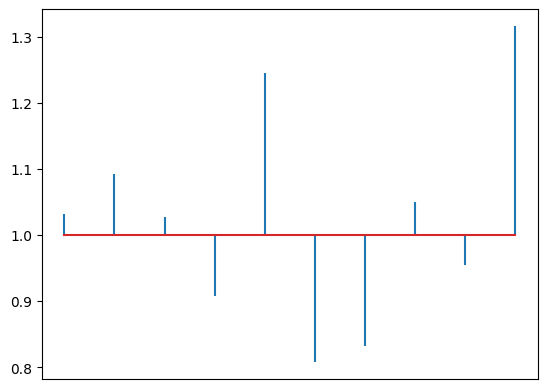

In [215]:
plt.stem(df.groupby('Nom_Districte')['Index_Barri'].mean(), markerfmt=' ', bottom=1)
plt.xticks([])
plt.show()

Otra manera de visualizar la distribucion de precios es recuperando la columna índice de precios que hemos creado previamente. En este nuestro interés está en ver la distribución del conjunto entorno a un índice medio de 1.